In [ ]:
import pandas as pd
import numpy as np
import re
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [ ]:
## find child gender in file; female = 0; male = 1

def find_gender(line):
  if "@ID:\teng|Brent|CHI" in line:
      if "female" in line:
        return 0
      else:
        return 1

In [ ]:
## read file and preprocess data

def preprocess(filepath, gender):
  with open(filepath, "r") as f:
    data_read = f.readlines()

    mother_speech = []

## preprocess mother speech
    for i in data_read:

      if gender == None:
        gender = find_gender(i)

      if i[:4] == "*MOT":
          i = i.replace("*MOT", "")
          i = re.sub("[:_0-9]+", "", i) # remove numbers
          i = re.sub("[\\t\\n]", "", i)
          i = i.replace("\x15", "") # ascii character
          mother_speech.append(i)
      else:
        pass
  return gender, mother_speech

In [ ]:
### CONCAT AND PREPROCESS DATA ###

data = [] # data from all dyads

brent_directory = "" # here put the path to the directory with dyad folders

## FOR DIRECTORY
for folder in os.listdir(brent_directory):
  folder_path = os.path.join(brent_directory, folder)

  if folder!="m1" and os.path.isdir(folder_path): # m1 is a dummy folder - no real data
    print(folder_path)
    gender = None
    dyad_data = []

## FOR DYAD FILE
    for filename in os.listdir(folder_path):
      f = os.path.join(folder_path, filename) # filepath to one cha file
      gender, session_data = preprocess(f, gender)
      dyad_data += session_data


    data.append({"speech":dyad_data, "gender":gender, "dyad":folder})


/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/c1
/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/d1
/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/f1
/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/q1
/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/m2
/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/s1
/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/i1
/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/f2
/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/j1
/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/w1
/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/s2
/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/w3
/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/v2
/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/s3
/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/v1
/content/drive/MyDrive/CogSci/sem 3/gender_data/Brent/t1


In [ ]:
## save merged data from all dyads as a dataframe
df = pd.DataFrame()

for dyad_data in data:
  dyad_df = pd.DataFrame(dyad_data)
  df = pd.concat([df, dyad_df])

In [ ]:
df

,speech,gender,dyad
0,Morgan .,0,c1
1,see !,0,c1
2,is that your shoe ?,0,c1
3,this is Mommy's shoe .,0,c1
4,look at Mommy's shoe !,0,c1
...,...,...,...
7703,and xxx it like this and put it in your hand l...,1,t1
7704,like that [?] .,1,t1
7705,yeah .,1,t1
7706,oh god bless you .,1,t1


In [ ]:
data = df.drop(labels = "dyad", axis = 1) # drop dyad column for training
data

,speech,gender
0,Morgan .,0
1,see !,0
2,is that your shoe ?,0
3,this is Mommy's shoe .,0
4,look at Mommy's shoe !,0
...,...,...
7703,and xxx it like this and put it in your hand l...,1
7704,like that [?] .,1
7705,yeah .,1
7706,oh god bless you .,1


In [ ]:
## class balance
df["gender"].value_counts()

1    93772
0    60955
Name: gender, dtype: int64

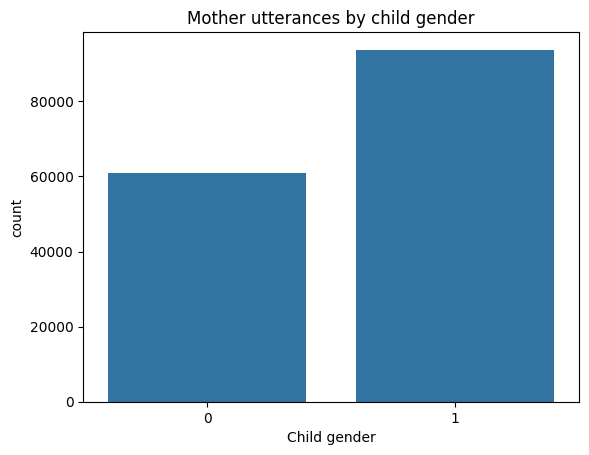

In [ ]:
sns.countplot(
  x='gender',
  data=data,
)

plt.xlabel("Child gender")
plt.title("Mother utterances by child gender");

In [ ]:
from wordcloud import WordCloud, STOPWORDS

## word clouds
def gen_wc(txt):
    stopwords = set(STOPWORDS)

    # crisp wordcloud : https://stackoverflow.com/a/28795577/11105356
    wc = WordCloud(width=800, height=400,background_color="white", max_font_size=300, stopwords = stopwords).generate(txt)
    plt.figure(figsize=(14,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [ ]:
female_speech = df[df.gender == 0]
male_speech = df[df.gender == 1]

f_speech_text = "".join(female_speech.speech.to_numpy().tolist())
m_speech_text = "".join(male_speech.speech.to_numpy().tolist())

In [ ]:
female_speech

,speech,gender,dyad
0,Morgan .,0,c1
1,see !,0,c1
2,is that your shoe ?,0,c1
3,this is Mommy's shoe .,0,c1
4,look at Mommy's shoe !,0,c1
...,...,...,...
17749,no no no [=! voice] .,0,s2
17750,&=speechplay .,0,s2
17751,&=speechplay .,0,s2
17752,oh .,0,s2


In [ ]:
f_speech_text

'Morgan . see ! is that your shoe ? this is Mommy\'s shoe . look at Mommy\'s shoe ! www . is your shoe tasty ? Mommy doesn\'t chew on hers . we just put it on our feet . uhoh what\'s that ? that\'s a microphone . can you say microphone@q ? xxx you can\'t pull it off Mommy\'s shirt (...) and it\'s not for eating &=laugh . not for eating . hey . no no no not for eating . here . you get down ! here\'s your dollie . here\'s Morgan\'s dollie . dollie . oh let\'s see if we can put this microphone back together ! there we go . here\'s your dollie . can you put her shoes on ? Daddy\'s gonna put your shoes on . yeah . there are your shoes . there are your shoes . www . okay . I got it . oops . did you drop your shoe ? look [?] ! Daddy (ha)s got the left shoe . Mommy (ha)s got the right shoe . Daddy (ha)s got the left shoe (..) right shoe . Mommy (ha)s got the left shoe . do you want your coat ? we\'ll put the coat on next . there we go . got your shoe on . can we tie it ? what (a)re you chewing

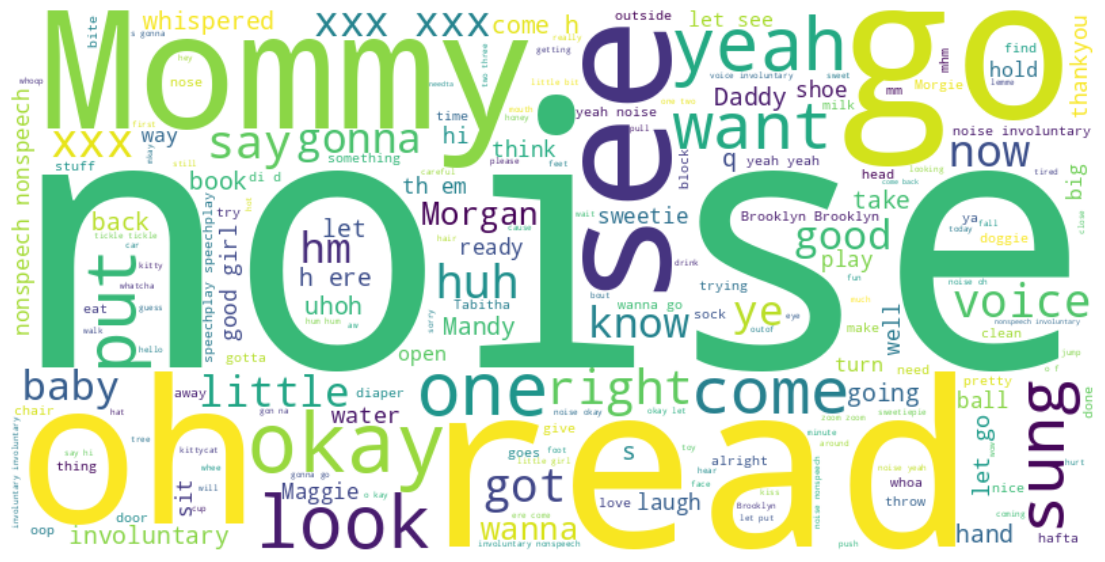

In [ ]:
### world cloud for speech to girls

gen_wc(f_speech_text)

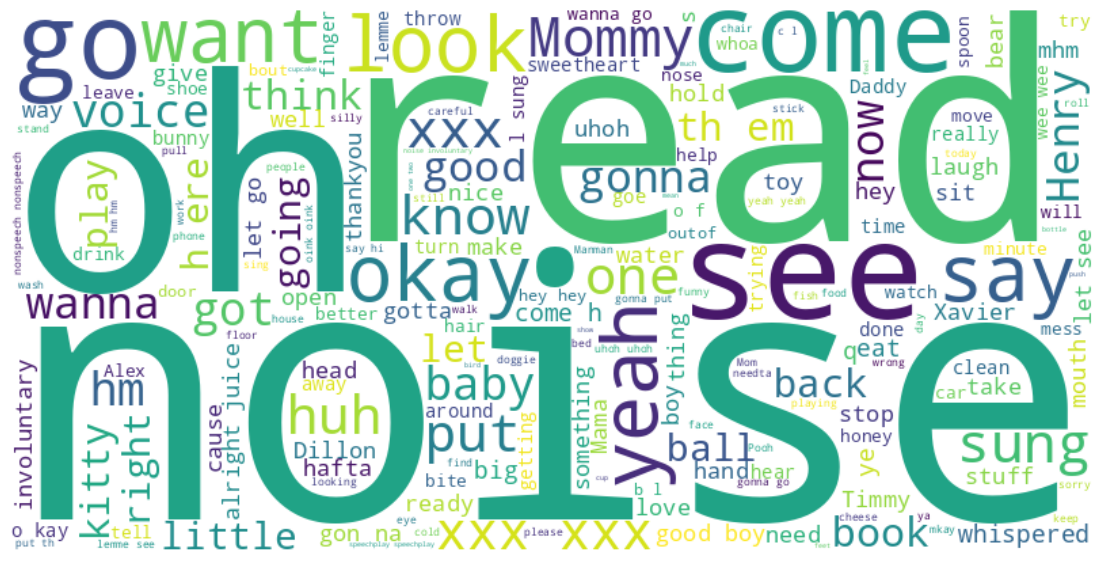

In [ ]:
### world cloud for speech to boys

gen_wc(m_speech_text)

# we can see that our data definitely needs more preprocessing - the most common "word" is "noise"!
# TO DO: get rid of "noise", "xxx"

### PREPARE DATASETS

In [ ]:
df_train, df_valid_test = train_test_split(data, test_size=0.2, random_state=42)
df_test, df_valid = train_test_split(df_valid_test, test_size=0.5, random_state=42)


df_train.shape, df_valid.shape, df_test.shape

((123781, 2), (15473, 2), (15473, 2))

In [ ]:
df_train["gender"].value_counts()

1    75080
0    48701
Name: gender, dtype: int64

In [ ]:
df_valid["gender"].value_counts()

1    9355
0    6118
Name: gender, dtype: int64

In [ ]:
df_valid

,speech,gender
9154,mhm .,1
4439,yeah .,0
11034,say “I don't like the formula” &=noise !,0
6826,how (a)bout these ?,1
1882,it make you laugh ?,0
...,...,...
5573,another barrette .,0
11460,okay .,1
6998,uhoh .,1
4435,Mama@q ?,0


In [ ]:
df_test["gender"].value_counts()

1    9337
0    6136
Name: gender, dtype: int64

In [ ]:
y_train = df_train["gender"]
y_valid= df_valid["gender"]
y_test= df_test["gender"]

## BASELINE

In [ ]:
### evaluation function

def evaluate(true, pred):
    score = f1_score(true, pred, average='macro')
    accuracy = accuracy_score(true, pred)
    precision = precision_score(true, pred)
    recall = recall_score(true, pred)

    cofusion_matrix = ConfusionMatrixDisplay.from_predictions(
        true,
        pred,
        display_labels=["male", "female"], # what should be first???
        xticks_rotation='vertical',
    )

    print(f"F1 score: {round(score,3)}\nAccuracy: {round(accuracy,3)}\nPrecison: {round(precision,3)}\nRecall: {round(recall,3)}")
    return cofusion_matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# making a baseline, sth to compare the results
# we have to beat it

pipeline = make_pipeline(
    ColumnTransformer([
        ("speech", TfidfVectorizer(min_df=100), "speech"),
    ], remainder='drop'),
    LogisticRegression(
        class_weight='balanced', # treat every class as equally important
    ),
)

pipeline = pipeline.fit(df_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score

F1 score: 0.619
Accuracy: 0.629
Precison: 0.712
Recall: 0.653


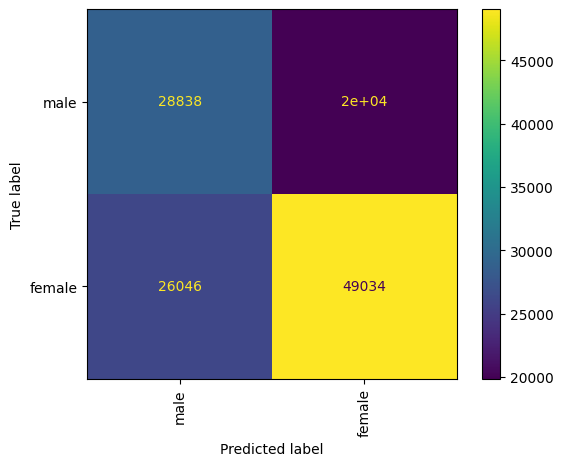

In [ ]:
evaluate(y_train, pipeline.predict(df_train)) ## BASELINE ACCURACY on TRAIN is 0.63

F1 score: 0.614
Accuracy: 0.623
Precison: 0.707
Recall: 0.644


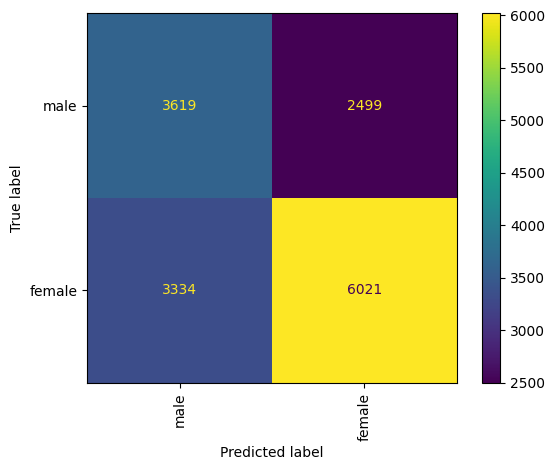

In [ ]:
evaluate(y_valid, pipeline.predict(df_valid)) ## BASELINE ACCURACY on VALID is 0.62

## BERT model

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
### DATASET CLASS
# model fine-tuning is based on this tutorial: https://www.sabrepc.com/blog/Deep-Learning-and-AI/text-classification-with-bert

class TextClassificationDataset(Dataset):

    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        return {'input_ids': encoding['input_ids'].flatten(), 'attention_mask': encoding['attention_mask'].flatten(), 'label': torch.tensor(label)}

In [ ]:
### CREATE BERT CLASSIFIER
class BERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        logits = self.fc(x)
        return logits

In [ ]:
### TRAIN FUNCTION
def train(model, data_loader, optimizer, scheduler, device):
    model.train()
    for batch in data_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

In [ ]:
### PREDICTION FUNCTION
def predict(text, model, tokenizer, device, max_length=128):
    model.eval()
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)
    return 1 if preds.item() == 1 else 0

In [ ]:
def evaluate_training(model, data_loader, device):
    model.eval()
    predictions = []
    actual_labels = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())
    return accuracy_score(actual_labels, predictions), classification_report(actual_labels, predictions)

In [ ]:
## SET UP
bert_model_name = "prajjwal1/bert-tiny" # https://huggingface.co/prajjwal1/bert-tiny
num_classes = 2
max_length = 128
batch_size = 16
num_epochs = 4
learning_rate = 2e-5

## TRAINING - trial 1

In [ ]:
### INITIALIZE/SET UP

tokenizer = BertTokenizer.from_pretrained(bert_model_name)

train_dataset = TextClassificationDataset(df_train["speech"].values, y_train.values, tokenizer, max_length)
val_dataset = TextClassificationDataset(df_valid["speech"].values, y_valid.values, tokenizer, max_length)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTClassifier(bert_model_name, num_classes).to(device)

In [ ]:
optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# about 2h of training
for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        train(model, train_dataloader, optimizer, scheduler, device)
        accuracy, report = evaluate_training(model, val_dataloader, device)
        print(f"Validation Accuracy: {accuracy:.4f}")
        print(report)

Epoch 1/4
Validation Accuracy: 0.6646
              precision    recall  f1-score   support

           0       0.63      0.36      0.46      6118
           1       0.67      0.86      0.76      9355

    accuracy                           0.66     15473
   macro avg       0.65      0.61      0.61     15473
weighted avg       0.66      0.66      0.64     15473

Epoch 2/4
Validation Accuracy: 0.6734
              precision    recall  f1-score   support

           0       0.64      0.40      0.49      6118
           1       0.69      0.85      0.76      9355

    accuracy                           0.67     15473
   macro avg       0.66      0.63      0.63     15473
weighted avg       0.67      0.67      0.65     15473

Epoch 3/4
Validation Accuracy: 0.6768
              precision    recall  f1-score   support

           0       0.62      0.49      0.54      6118
           1       0.70      0.80      0.75      9355

    accuracy                           0.68     15473
   macro avg  

In [ ]:
torch.save(model.state_dict(), "bert_classifier_v1.pth") # if working on google colab better specify a folder

#### EVALUATION - trial 1

F1 score: 0.641
Accuracy: 0.677
Precison: 0.698
Recall: 0.822


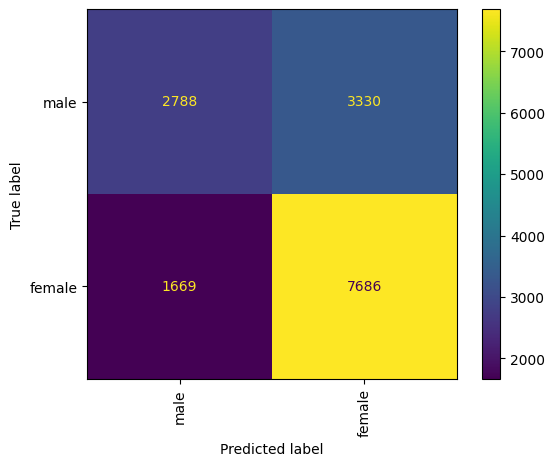

In [ ]:
df_valid["gender_pred"] = df_valid["speech"].apply(predict, args=(model, tokenizer, device))
evaluate(y_valid, df_valid["gender_pred"])

F1 score: 0.638
Accuracy: 0.675
Precison: 0.694
Recall: 0.825


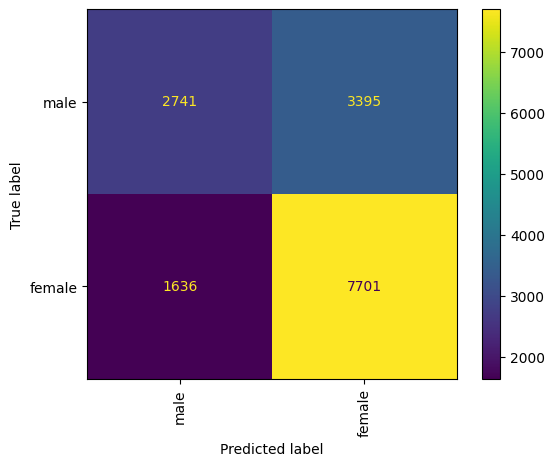

In [ ]:
df_test["gender_pred"] = df_test["speech"].apply(predict, args=(model, tokenizer, device))
evaluate(y_test, df_test["gender_pred"])

## TRAINING - trial 2

In [ ]:
## PREPROCESSING  version 2 - without vocalizations

def preprocess_v2(filepath, gender):
  with open(filepath, "r") as f:
    data_read = f.readlines()

    mother_speech = []

## preprocessing mother speech
    for i in data_read:

      if gender == None:
        gender = find_gender(i)

      if i[:4] == "*MOT":
          i = i.replace("*MOT", "")
          i = re.sub("[:_0-9]+", "", i) # remove numbers
          i = re.sub("[\\t\\n]", "", i)
          i = i.replace("\x15", "") # ascii character
          i = re.sub("&=.+", "", i) # delete all vocalizations (not words) at the end of the utterance
          mother_speech.append(i)
      else:
        pass
  return gender, mother_speech

In [ ]:
### CONCAT AND PREPROCESS DATA - version 2 ###

data = [] # data from all dyads

## FOR DIRECTORY
for folder in os.listdir(brent_directory):
  folder_path = os.path.join(brent_directory, folder)

  if folder!="m1" and os.path.isdir(folder_path): # m1 is a dummy folder - no real data
    print(folder_path)
    gender = None
    dyad_data = []

## FOR DYAD FILE
    for filename in os.listdir(folder_path):
      f = os.path.join(folder_path, filename) # filepath to one cha file
      gender, session_data = preprocess_v2(f, gender)
      dyad_data += session_data


    data.append({"speech":dyad_data, "gender":gender, "dyad":folder})

In [ ]:
## save merged data from all dyads as a dataframe
df = pd.DataFrame()

for dyad_data in data:
  dyad_df = pd.DataFrame(dyad_data)
  df = pd.concat([df, dyad_df])

data = df.drop(labels = "dyad", axis = 1) # drop dyad column for training

In [ ]:
df_train, df_valid_test = train_test_split(data, test_size=0.2, random_state=42)
df_test, df_valid = train_test_split(df_valid_test, test_size=0.5, random_state=42)

y_train = df_train["gender"]
y_valid= df_valid["gender"]
y_test= df_test["gender"]

In [ ]:
### INITIALIZE/SET UP

#y_train = df_train["gender"]

tokenizer = BertTokenizer.from_pretrained(bert_model_name)

### now adding "values"
train_dataset = TextClassificationDataset(df_train["speech"].values, y_train.values, tokenizer, max_length)
val_dataset = TextClassificationDataset(df_valid["speech"].values, y_valid.values, tokenizer, max_length)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTClassifier(bert_model_name, num_classes).to(device)

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

In [ ]:
optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# almost 2h of training
for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        train(model, train_dataloader, optimizer, scheduler, device)
        accuracy, report = evaluate(model, val_dataloader, device)
        print(f"Validation Accuracy: {accuracy:.4f}")
        print(report)

Epoch 1/4
Validation Accuracy: 0.6637
              precision    recall  f1-score   support

           0       0.63      0.36      0.46      6118
           1       0.67      0.86      0.76      9355

    accuracy                           0.66     15473
   macro avg       0.65      0.61      0.61     15473
weighted avg       0.66      0.66      0.64     15473

Epoch 2/4
Validation Accuracy: 0.6711
              precision    recall  f1-score   support

           0       0.61      0.46      0.53      6118
           1       0.70      0.81      0.75      9355

    accuracy                           0.67     15473
   macro avg       0.65      0.64      0.64     15473
weighted avg       0.66      0.67      0.66     15473

Epoch 3/4
Validation Accuracy: 0.6793
              precision    recall  f1-score   support

           0       0.64      0.44      0.52      6118
           1       0.70      0.84      0.76      9355

    accuracy                           0.68     15473
   macro avg  

In [ ]:
torch.save(model.state_dict(), "bert_classifier.pth")

In [ ]:
# #model = BERTClassifier(bert_model_name, num_classes).to(device)
# model.load_state_dict(torch.load("/content/gdrive/bert_classifier.pth"))
# model.eval()

#### EVALUATION - trial 2

In [ ]:
prediction = predict("hi little boy", model, tokenizer, device)

In [ ]:
prediction

1

In [ ]:
## evaluation on valid data

df_valid["gender_pred"] = df_valid["speech"].apply(predict, args=(model, tokenizer, device))

In [ ]:
df_valid["gender_pred"].value_counts()

1    11407
0     4066
Name: gender_pred, dtype: int64

F1 score: 0.637
Accuracy: 0.68
Precison: 0.693
Recall: 0.845


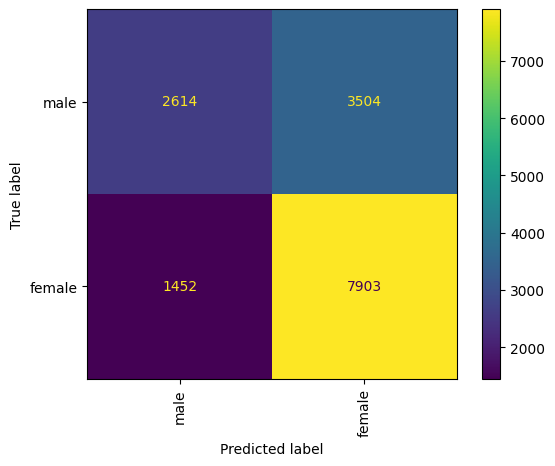

In [ ]:
evaluate(y_valid, df_valid["gender_pred"])

In [ ]:
## evaluation on test data

df_test["gender_pred"] = df_test["speech"].apply(predict, args=(model, tokenizer, device))

F1 score: 0.632
Accuracy: 0.675
Precison: 0.688
Recall: 0.841


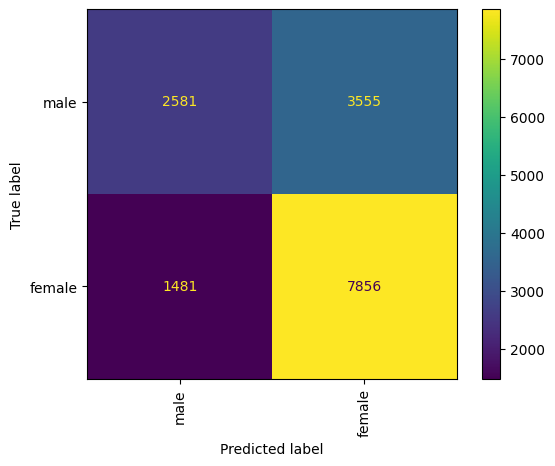

In [ ]:
evaluate(y_test, df_test["gender_pred"])